## Logistic Regression - Prediction of Surrvival on Titanic Data Set

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# The target variable is "Surrvived".   1 - Survived  and 0 - Not-Surrvived

In [7]:
# Reading the file.

titanic_data =  pd.read_csv("E:\\DSP 32 lectures- Imarticus\\DSP Thane\Python\\titanic_1.csv")

In [8]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [54]:
titanic_data.shape

(1309, 14)

## EDA :


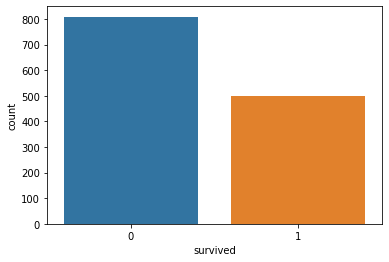

In [39]:
# To coun the no. of passengers who surrvived and not surrvived.
#  1 - Survived  and 0 - Not-Surrvived

sb.countplot(x = "survived" , data = titanic_data);

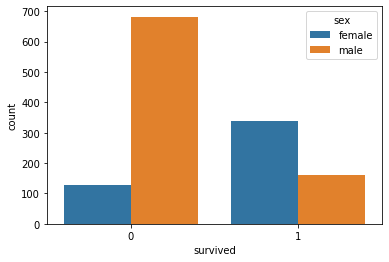

In [40]:
# To count the MAle survivors and Female Surrvivors:

sb.countplot(x = "survived" , hue = "sex" , data = titanic_data);

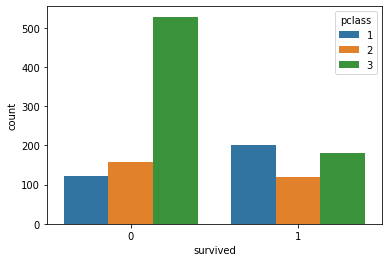

In [21]:
# To check the survivord basd upon class. 

sb.countplot(x = "survived" , hue = "pclass" , data = titanic_data);

# From this graph we conclued that the passsengers who didn't survive were of the 3rd class or the lowest class and 
# the passengers traveeling in the 1st class have the better chances of survival.

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


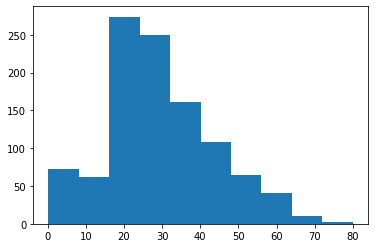

In [23]:
# To plot the age distribution among the passengers.

plt.hist(titanic_data.age);

# This plot shows that there were more middle aged passengers(20-40) present on the ship as comapred to the people
# who were of age (45 and above).

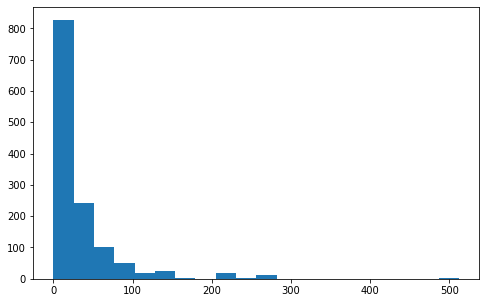

In [35]:
# To plot a graph of fare distribution:


plt.hist(titanic_data.fare , bins= 20);


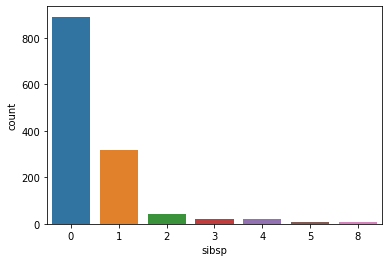

In [48]:
# To count the no. of spouses/children on borad.

sb.countplot(x ="sibsp", data = titanic_data);

# Max. no. of passengers did not have any spouse/siblings onboard and there were about 300 passengers who had
# 1 spouse/siblings onboard.

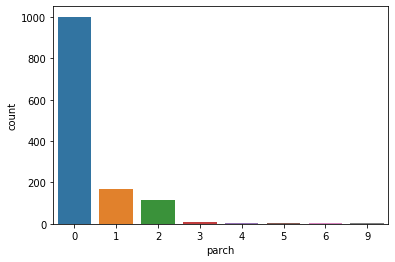

In [49]:
# To determine the no. of parent and children present on board.

sb.countplot(x = "parch" , data = titanic_data);

# Max. no. of passengers had no parent/children present on board and there were about 180 passengers who had 1
#  parent/children present onboard, and there were about 150 passengers who had 2 parent/children prsent on board.

## Data Cleaning :

In [9]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

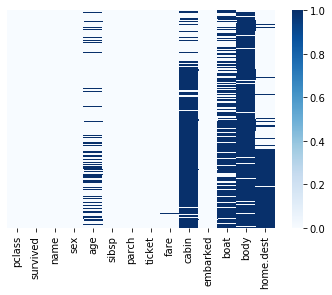

In [10]:
# To plot the amount of missing values in the data.

sb.heatmap(titanic_data.isnull() , yticklabels = False , cmap= "Blues");


# From the graph it is clear that "cabin","body" and "boat" col. have very high amount of null values present in them.

In [11]:
# To drop the col. which have more than 50% of data as null values and also dropping the "home.dest" col.

titanic_data.drop( ["cabin" , "body" , "boat" , "home.dest"] , axis = 1 , inplace = True )

In [12]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [14]:
# To check for Null value for the remaining col.

titanic_data.isnull().sum()

# there are 4 col. which are having null values.

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [16]:
# To handle the Null values :

# For continous variables:

titanic_data.age.fillna(titanic_data.age.mean() , inplace = True)
titanic_data.fare.fillna(titanic_data.fare.mean() , inplace = True)

# For Categorical variables :

titanic_data.embarked.fillna("S" , inplace = True)



In [17]:
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [21]:
# To convert the Categorical Data / NOn-Numeric data into Numeric data :

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [19]:
# Dropping the irrelevant col. 

titanic_data.drop(['name', "ticket"] , axis =1 , inplace = True)

In [20]:
titanic_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [22]:
# Conversion of Non-Numeric values to Numeric values.

titanic_data.pclass = le.fit_transform(titanic_data.pclass)
titanic_data.sex = le.fit_transform(titanic_data.sex)
titanic_data.embarked = le.fit_transform(titanic_data.embarked)

In [11]:
titanic_data.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,0,1,0,29.0000,0,0,211.3375,2
1,0,1,1,0.9167,1,2,151.5500,2
2,0,0,0,2.0000,1,2,151.5500,2
3,0,0,1,30.0000,1,2,151.5500,2
4,0,0,0,25.0000,1,2,151.5500,2


## Sampling the Data :

In [23]:
x = titanic_data.iloc[: , [0,2,3,4,5,6,7]]
y = titanic_data.iloc[:, -7]

In [24]:
# importing the train test split function from sklearn

from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.20 , random_state = 150)

In [26]:
print(x_train.shape)
print(y_train.shape)
print("----------")
print(x_test.shape)
print(y_test.shape)

(1047, 7)
(1047,)
----------
(262, 7)
(262,)


In [27]:
# Model Building :

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [28]:
# fit the model :

log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predcition of Values :

pred_value = log_model.predict(x_test)
pred_value

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [30]:
# To eavluate the model :

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [31]:
report =  classification_report(y_test,pred_value)
report

'              precision    recall  f1-score   support\n\n           0       0.81      0.84      0.83       160\n           1       0.74      0.69      0.71       102\n\n    accuracy                           0.78       262\n   macro avg       0.77      0.77      0.77       262\nweighted avg       0.78      0.78      0.78       262\n'

In [32]:
table = confusion_matrix(y_test,pred_value)
table

array([[135,  25],
       [ 32,  70]], dtype=int64)

In [33]:
acc = accuracy_score(y_test,pred_value)
acc

0.7824427480916031

In [34]:
# To predict the probabilities :

pred_prob = log_model.predict_proba(x_test)
pred_prob


array([[0.74914817, 0.25085183],
       [0.87924817, 0.12075183],
       [0.68829414, 0.31170586],
       [0.16004074, 0.83995926],
       [0.89921531, 0.10078469],
       [0.44324042, 0.55675958],
       [0.21472771, 0.78527229],
       [0.09784194, 0.90215806],
       [0.83293631, 0.16706369],
       [0.8670028 , 0.1329972 ],
       [0.85163822, 0.14836178],
       [0.8416381 , 0.1583619 ],
       [0.85231927, 0.14768073],
       [0.48708846, 0.51291154],
       [0.78564422, 0.21435578],
       [0.09604584, 0.90395416],
       [0.07859447, 0.92140553],
       [0.89930602, 0.10069398],
       [0.93494353, 0.06505647],
       [0.83713475, 0.16286525],
       [0.94792404, 0.05207596],
       [0.08438976, 0.91561024],
       [0.93285952, 0.06714048],
       [0.93322758, 0.06677242],
       [0.88206735, 0.11793265],
       [0.11297981, 0.88702019],
       [0.84595188, 0.15404812],
       [0.80979103, 0.19020897],
       [0.13714981, 0.86285019],
       [0.35766226, 0.64233774],
       [0.

In [35]:
# To plot the ROC curve and find the AUROC value :

from sklearn.metrics import roc_curve , roc_auc_score

In [36]:
# To calculate the values of tpr and fpr :

tpr , fpr , thresholds = roc_curve(y_test , pred_prob[:,1])

In [37]:
tpr

array([0.     , 0.     , 0.     , 0.00625, 0.00625, 0.0125 , 0.0125 ,
       0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.01875, 0.025  ,
       0.025  , 0.0375 , 0.0375 , 0.04375, 0.04375, 0.05   , 0.05   ,
       0.05   , 0.05   , 0.08125, 0.08125, 0.10625, 0.10625, 0.1375 ,
       0.1375 , 0.14375, 0.14375, 0.15   , 0.15   , 0.16875, 0.16875,
       0.18125, 0.18125, 0.2125 , 0.2125 , 0.21875, 0.21875, 0.225  ,
       0.225  , 0.23125, 0.23125, 0.2375 , 0.2375 , 0.24375, 0.24375,
       0.25   , 0.25   , 0.3375 , 0.3375 , 0.3625 , 0.3625 , 0.38125,
       0.38125, 0.3875 , 0.3875 , 0.43125, 0.4375 , 0.4625 , 0.475  ,
       0.4875 , 0.4875 , 0.51875, 0.51875, 0.53125, 0.53125, 0.56875,
       0.58125, 0.59375, 0.61875, 0.64375, 0.64375, 0.65   , 0.6625 ,
       0.6875 , 0.6875 , 0.725  , 0.75625, 0.775  , 0.775  , 0.8125 ,
       0.8125 , 0.81875, 0.81875, 0.83125, 0.84375, 0.85   , 0.85   ,
       0.8875 , 0.8875 , 1.     ])

In [38]:
fpr

array([0.        , 0.00980392, 0.12745098, 0.12745098, 0.29411765,
       0.29411765, 0.31372549, 0.31372549, 0.40196078, 0.42156863,
       0.44117647, 0.46078431, 0.48039216, 0.48039216, 0.5       ,
       0.5       , 0.52941176, 0.52941176, 0.54901961, 0.54901961,
       0.58823529, 0.61764706, 0.62745098, 0.62745098, 0.6372549 ,
       0.6372549 , 0.65686275, 0.65686275, 0.66666667, 0.66666667,
       0.67647059, 0.67647059, 0.68627451, 0.68627451, 0.69607843,
       0.69607843, 0.70588235, 0.70588235, 0.73529412, 0.73529412,
       0.74509804, 0.74509804, 0.7745098 , 0.7745098 , 0.78431373,
       0.78431373, 0.80392157, 0.80392157, 0.81372549, 0.81372549,
       0.83333333, 0.83333333, 0.84313725, 0.84313725, 0.85294118,
       0.85294118, 0.8627451 , 0.8627451 , 0.87254902, 0.87254902,
       0.88235294, 0.88235294, 0.89215686, 0.89215686, 0.90196078,
       0.90196078, 0.91176471, 0.91176471, 0.92156863, 0.92156863,
       0.92156863, 0.92156863, 0.93137255, 0.93137255, 0.94117

In [39]:
# To find the Area under ROC curve :

AUROC = roc_auc_score(y_test, pred_value)
AUROC

# The value of AUROC is 0.7650122549019608

0.7650122549019608

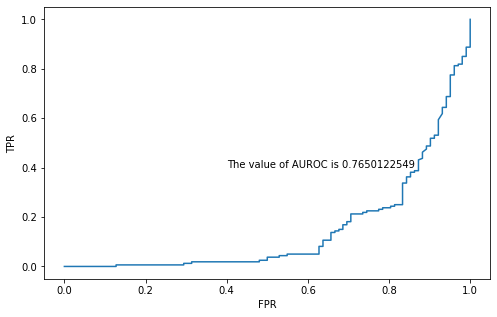

In [41]:
# Plot the curve b/w FPR and TPR:

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x = 0.4 , y = 0.4 , s = "The value of AUROC is 0.7650122549");

In [1]:
# Tuning the model by adjusting the threshold probability value , the default value for threshold is 0.5.

# "binarize" library is used from "sklearn" for this purpose.

In [42]:
from sklearn.preprocessing import binarize

In [44]:
# taking the probability values for class 1 from the predicted probabilities.

pred_prob_class1 = pred_prob[:, 1]
pred_prob_class1 = pred_prob_class1.reshape(1,-1)
pred_prob_class1

array([[0.25085183, 0.12075183, 0.31170586, 0.83995926, 0.10078469,
        0.55675958, 0.78527229, 0.90215806, 0.16706369, 0.1329972 ,
        0.14836178, 0.1583619 , 0.14768073, 0.51291154, 0.21435578,
        0.90395416, 0.92140553, 0.10069398, 0.06505647, 0.16286525,
        0.05207596, 0.91561024, 0.06714048, 0.06677242, 0.11793265,
        0.88702019, 0.15404812, 0.19020897, 0.86285019, 0.64233774,
        0.06658907, 0.61601344, 0.45236654, 0.12235448, 0.16918472,
        0.77149739, 0.14787055, 0.86980788, 0.5789959 , 0.30310589,
        0.10073108, 0.4797098 , 0.82731666, 0.94896706, 0.07856779,
        0.55798454, 0.1287858 , 0.04918195, 0.13226072, 0.07777544,
        0.06549188, 0.08950098, 0.35364995, 0.12238545, 0.86136712,
        0.68018673, 0.33579909, 0.19425404, 0.40182039, 0.55528479,
        0.09443591, 0.43669945, 0.28086066, 0.4294262 , 0.08493834,
        0.10062807, 0.62662316, 0.10073382, 0.10641108, 0.12575223,
        0.68058311, 0.136063  , 0.83292338, 0.39

In [45]:
# USing the binarize function to set the new threshold value of probability and calculating the new pred value from that
#  threshold.

y_pred_new = binarize(pred_prob_class1, threshold=0.40)[0]
y_pred_new

# the above code is used to calculate the predicted vales of y according to the new threshold prob. value 0.4.
# the probability values less than 0.4 will belong to class "0" and the prob. values more than 0.40 will belong to class "1".



array([0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1.

In [47]:
# converting the "y_pred_new" into integer

y_pred_new = y_pred_new.astype(int)
y_pred_new


array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [50]:
# to generate the new confudion matrix 

table1 = confusion_matrix(y_test, y_pred_new)
table1

array([[126,  34],
       [ 27,  75]], dtype=int64)

In [51]:
# old confusion matrix :

table

array([[135,  25],
       [ 32,  70]], dtype=int64)

In [53]:
acc_new = accuracy_score(y_test , y_pred_new)
acc_new

0.767175572519084

In [55]:
print(classification_report( y_test , y_pred_new))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       160
           1       0.69      0.74      0.71       102

    accuracy                           0.77       262
   macro avg       0.76      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262

